# ESTUDO COMPARATIVO DE ALGORITMOS DE APRENDIZADO DE MÁQUINA PARA PREVISÃO DE CHURN 

# Coleta de dados

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [106]:
file = 'ecom-user-churn-data.csv'

In [107]:
df = pd.read_csv(file)

    Coluna	    Descrição
    Visitorid	| Identificação do usuário

    ses_rec	| Recência da Sessão: Dif. De tempo entre a última sessão e o tempo q/ a base foi gerada (em dias)

    ses_rec_avg	| Recência da Sessão: Média

    ses_rec_sd	| Recência da Sessão: Desvio Padrão

    ses_rec_cv	| Recência da Sessão: Coeficiente de variação

    user_rec | Recência do usuário: Dif. de tempo entre a primeira sessão do usuário e o tempo que a base foi gerada (em dias)

    ses_n	| Quantidade de sessão

    ses_n_r	| Taxa de frequência da sessão: = Ses_n / User_rec

    int_n	| Qtde de Interação do usuário no app. (view/ add-to-cart/buy clicks)

    int_n_r	| Taxa de Frequência usuário no app. = Int_n/ses_n

    tran_n	| Quantidade de Transação

    tran_n_r |	Taxa de Frequência de transação (taxa de conversão do indivíduo) = tran_n / ses_n
    
    rev_sum	| Total de Receita (em USD)

    rev_sum_r	| Taxa de Receita gerada por sessão = rev_sum / ses_n

    major_spend_r	| Proporção de sessões com gasto acima da média 
    
    int_cat_n_avg	| Média de qtde de categoria que interagiu
    
    int_itm_n_avg	| Média de qtde de intens que interagiu
    
    ses_mo_avg	 | Sessão por mês: média
    
    ses_mo_sd	 | Sessão por mês: desvio padrão
    
    ses_ho_avg   |	Sessão por hora: média
    
    ses_ho_sd    | 	Sessão por hora: desvio padrão
    
    ses_wknd_r   |	Sessão por final de semana: média
    
    ses_len_avg	 | Média em minutos da sessão = soma(Tamanho da sessão em minutos) / qtd de sessões
    
    time_to_int	Média do tempo da interação (em minutos)    =qtde de min da sessão / int_n
    
    time_to_tran	Média de dias entre transações (em dias) =qtde de dias / tran_n
    
    int_cat1_n	Quantidade de interação na categoria 1
    
    int_cat2_n	Quantidade de interação na categoria 2
    
    int_cat3_n	Quantidade de interação na categoria 3
    
    int_cat4_n	Quantidade de interação na categoria 4
    
    int_cat5_n	Quantidade de interação na categoria 5
    
    int_cat6_n	Quantidade de interação na categoria 6
    
    int_cat7_n	Quantidade de interação na categoria 7
    
    int_cat8_n	Quantidade de interação na categoria 8
    
    int_cat9_n	Quantidade de interação na categoria 9
    
    int_cat10_n	Quantidade de interação na categoria 10
    
    int_cat11_n	Quantidade de interação na categoria 11
    
    int_cat12_n	Quantidade de interação na categoria 12
    
    int_cat13_n	Quantidade de interação na categoria 13
    
    int_cat15_n	Quantidade de interação na categoria 15
    
    int_cat16_n	Quantidade de interação na categoria 16
    
    int_cat17_n	Quantidade de interação na categoria 17
    
    int_cat18_n	Quantidade de interação na categoria 18
    
    int_cat19_n	Quantidade de interação na categoria 19
    
    int_cat20_n	Quantidade de interação na categoria 20
    
    int_cat21_n	Quantidade de interação na categoria 21
    
    int_cat22_n	Quantidade de interação na categoria 22
    
    int_cat23_n	Quantidade de interação na categoria
    
    int_cat24_n	Quantidade de interação na categoria
    
    target_class	Identifica se cliente é Churn


### colunas e tipo

In [108]:
df.dtypes

visitorid          int64
ses_rec          float64
ses_rec_avg      float64
ses_rec_sd       float64
ses_rec_cv       float64
user_rec         float64
ses_n            float64
ses_n_r          float64
int_n            float64
int_n_r          float64
tran_n           float64
tran_n_r         float64
rev_sum          float64
rev_sum_r        float64
major_spend_r    float64
int_cat_n_avg    float64
int_itm_n_avg    float64
ses_mo_avg       float64
ses_mo_sd        float64
ses_ho_avg       float64
ses_ho_sd        float64
ses_wknd_r       float64
ses_len_avg      float64
time_to_int      float64
time_to_tran     float64
int_cat1_n         int64
int_cat2_n         int64
int_cat3_n         int64
int_cat4_n         int64
int_cat5_n         int64
int_cat6_n         int64
int_cat7_n         int64
int_cat8_n         int64
int_cat9_n         int64
int_cat10_n        int64
int_cat11_n        int64
int_cat12_n        int64
int_cat13_n        int64
int_cat15_n        int64
int_cat16_n        int64


# Processamento e tratamento de dados

#### Dados faltantes, nulos

In [109]:
df.shape

(49358, 49)

In [110]:
# verificar se há valores nulos ou faltantes
df.isnull().sum()

visitorid        0
ses_rec          0
ses_rec_avg      0
ses_rec_sd       0
ses_rec_cv       0
user_rec         0
ses_n            0
ses_n_r          0
int_n            0
int_n_r          0
tran_n           0
tran_n_r         0
rev_sum          0
rev_sum_r        0
major_spend_r    0
int_cat_n_avg    0
int_itm_n_avg    0
ses_mo_avg       0
ses_mo_sd        0
ses_ho_avg       0
ses_ho_sd        0
ses_wknd_r       0
ses_len_avg      0
time_to_int      0
time_to_tran     0
int_cat1_n       0
int_cat2_n       0
int_cat3_n       0
int_cat4_n       0
int_cat5_n       0
int_cat6_n       0
int_cat7_n       0
int_cat8_n       0
int_cat9_n       0
int_cat10_n      0
int_cat11_n      0
int_cat12_n      0
int_cat13_n      0
int_cat15_n      0
int_cat16_n      0
int_cat17_n      0
int_cat18_n      0
int_cat19_n      0
int_cat20_n      0
int_cat21_n      0
int_cat22_n      0
int_cat23_n      0
int_cat24_n      0
target_class     0
dtype: int64

In [111]:
df.isna().sum()

visitorid        0
ses_rec          0
ses_rec_avg      0
ses_rec_sd       0
ses_rec_cv       0
user_rec         0
ses_n            0
ses_n_r          0
int_n            0
int_n_r          0
tran_n           0
tran_n_r         0
rev_sum          0
rev_sum_r        0
major_spend_r    0
int_cat_n_avg    0
int_itm_n_avg    0
ses_mo_avg       0
ses_mo_sd        0
ses_ho_avg       0
ses_ho_sd        0
ses_wknd_r       0
ses_len_avg      0
time_to_int      0
time_to_tran     0
int_cat1_n       0
int_cat2_n       0
int_cat3_n       0
int_cat4_n       0
int_cat5_n       0
int_cat6_n       0
int_cat7_n       0
int_cat8_n       0
int_cat9_n       0
int_cat10_n      0
int_cat11_n      0
int_cat12_n      0
int_cat13_n      0
int_cat15_n      0
int_cat16_n      0
int_cat17_n      0
int_cat18_n      0
int_cat19_n      0
int_cat20_n      0
int_cat21_n      0
int_cat22_n      0
int_cat23_n      0
int_cat24_n      0
target_class     0
dtype: int64

#### verificar se há alguma variável com dado estranho ou inconsistente

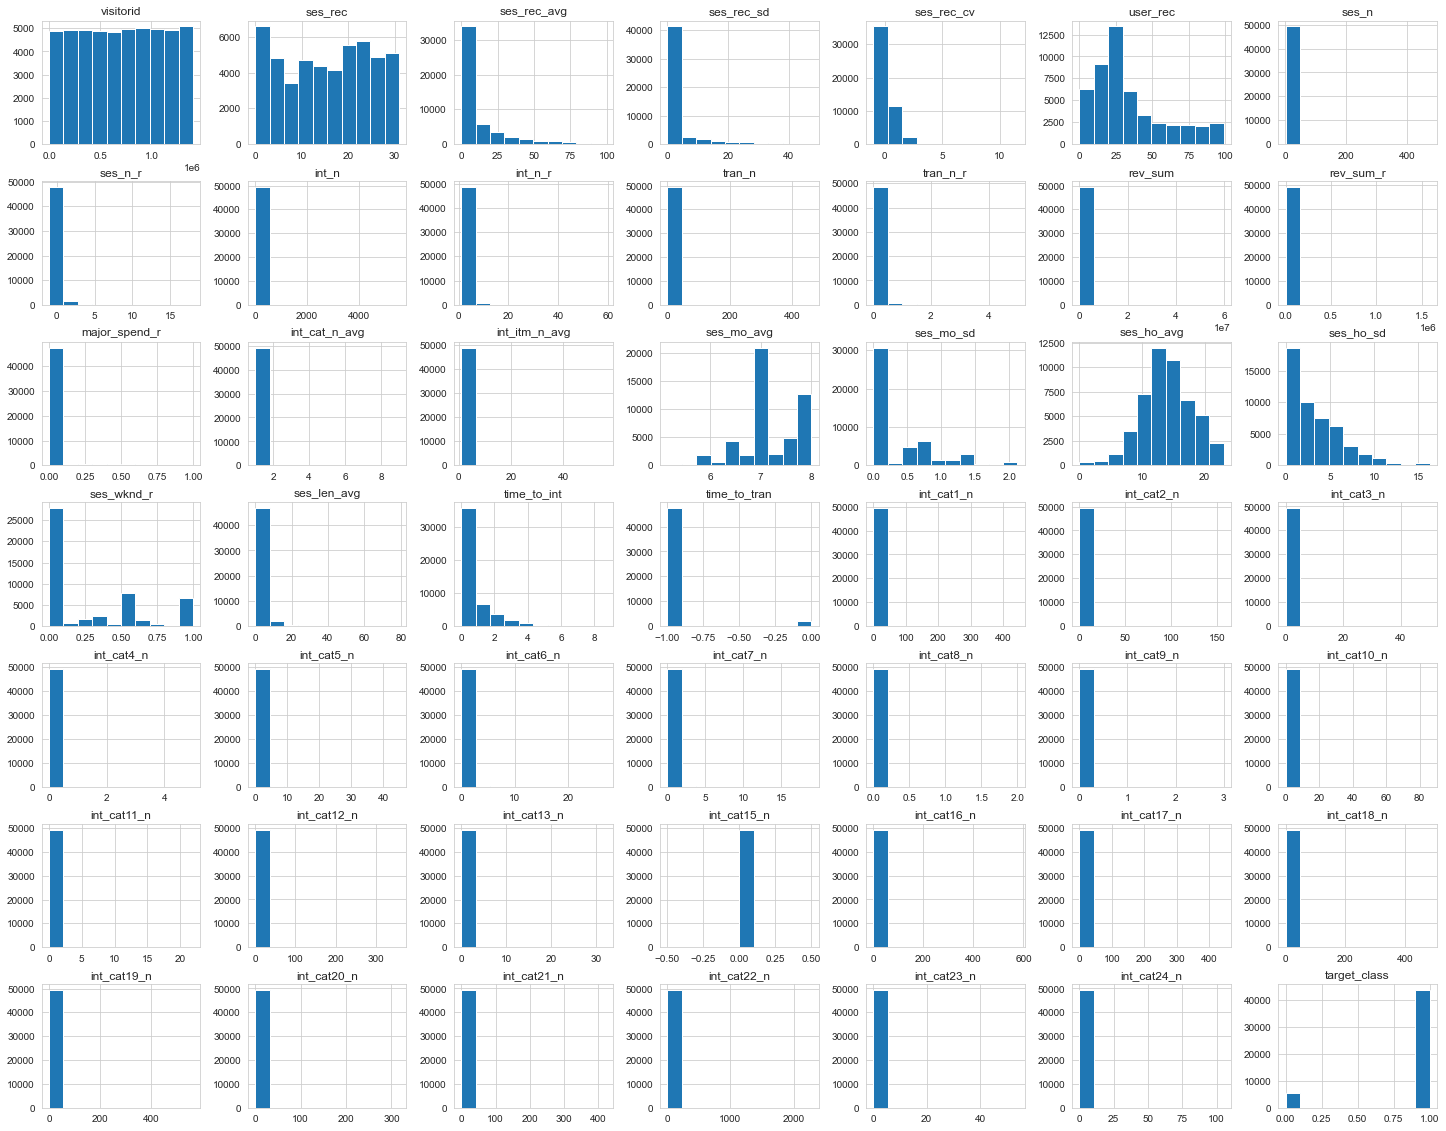

In [112]:
_,ax = plt.subplots(figsize=(25,20))
df.hist(ax=ax)
plt.show();

#### As colunas time_to_tran e int_cat15_n apresentam valores negativos, entender se estes valores fazem sentido

In [113]:
# Entender porque o gráfico apresenta o campo int_cat15_n com um eixo x de valores negativos
## buscarei qual o menor valor desta categoria
df['int_cat15_n'].min()

0

In [114]:
# Somarei os dados desta coluna para entender se há valores nela
df['int_cat15_n'].sum()

0

In [115]:
## print('Verificando se há mais alguma categoria alem da cat15 com valores zerados')
'ses_rec: ' + str(df['ses_rec'].sum()), 'ses_rec_avg: ' + str(df['ses_rec_avg'].sum()), 'ses_rec_sd: ' + str(df['ses_rec_sd'].sum()), 'ses_rec_cv: ' + str(df['ses_rec_cv'].sum()), 'ses_n: ' + str(df['ses_n'].sum()), 'int_n: ' + str(df['int_n'].sum()), 'int_n_r: ' + str(df['int_n_r'].sum()), 'tran_n: ' + str(df['tran_n'].sum()), 'tran_n_r: ' + str(df['tran_n_r'].sum()), 'rev_sum: ' + str(df['rev_sum'].sum()), 'rev_sum_r: ' + str(df['rev_sum_r'].sum()), 'major_spend_r: ' + str(df['major_spend_r'].sum()), 'int_cat_n_avg: ' + str(df['int_cat_n_avg'].sum()), 'int_itm_n_avg: ' + str(df['int_itm_n_avg'].sum()), 'ses_mo_avg: ' + str(df['ses_mo_avg'].sum()), 'ses_mo_sd: ' + str(df['ses_mo_sd'].sum()), 'ses_ho_avg: ' + str(df['ses_ho_avg'].sum()), 'ses_wknd_r: ' + str(df['ses_wknd_r'].sum()), 'ses_len_avg: ' + str(df['ses_len_avg'].sum()), 'time_to_int: ' + str(df['time_to_int'].sum()), 'time_to_tran: ' + str(df['time_to_tran'].sum()), 'int_cat1_n: ' + str(df['int_cat1_n'].sum()), 'int_cat2_n: ' + str(df['int_cat2_n'].sum()), 'int_cat3_n: ' + str(df['int_cat3_n'].sum()), 'int_cat4_n: ' + str(df['int_cat4_n'].sum()), 'int_cat5_n: ' + str(df['int_cat5_n'].sum()), 'int_cat6_n: ' + str(df['int_cat6_n'].sum()), 'int_cat7_n: ' + str(df['int_cat7_n'].sum()), 'int_cat8_n: ' + str(df['int_cat8_n'].sum()), 'int_cat9_n: ' + str(df['int_cat9_n'].sum()), 'int_cat10_n: ' + str(df['int_cat10_n'].sum()), 'int_cat11_n: ' + str(df['int_cat11_n'].sum()), 'int_cat12_n: ' + str(df['int_cat12_n'].sum()), 'int_cat13_n: ' + str(df['int_cat13_n'].sum()), 'int_cat15_n: ' + str(df['int_cat15_n'].sum()), 'int_cat16_n: ' + str(df['int_cat16_n'].sum()), 'int_cat17_n: ' + str(df['int_cat17_n'].sum()), 'int_cat18_n: ' + str(df['int_cat18_n'].sum()), 'int_cat19_n: ' + str(df['int_cat19_n'].sum()), 'int_cat20_n: ' + str(df['int_cat20_n'].sum()), 'int_cat21_n: ' + str(df['int_cat21_n'].sum()), 'int_cat22_n: ' + str(df['int_cat22_n'].sum()), 'int_cat23_n: ' + str(df['int_cat23_n'].sum()), 'int_cat24_n: ' + str(df['int_cat24_n'].sum())

('ses_rec: 762820.0',
 'ses_rec_avg: 554369.8674835231',
 'ses_rec_sd: 133856.99148009',
 'ses_rec_cv: -992.0921706190002',
 'ses_n: 166161.0',
 'int_n: 331502.0',
 'int_n_r: 84943.8869495',
 'tran_n: 5491.0',
 'tran_n_r: 915.800915634',
 'rev_sum: 590871732.0',
 'rev_sum_r: 93436349.18239',
 'major_spend_r: 659.493635951',
 'int_cat_n_avg: 50277.7823605',
 'int_itm_n_avg: 70629.51304729999',
 'ses_mo_avg: 355492.9948333',
 'ses_mo_sd: 17048.66097259',
 'ses_ho_avg: 685620.77517136',
 'ses_wknd_r: 13359.213606933',
 'ses_len_avg: 85878.9006858652',
 'time_to_int: 32175.5468645826',
 'time_to_tran: -47369.0',
 'int_cat1_n: 6795',
 'int_cat2_n: 8470',
 'int_cat3_n: 2025',
 'int_cat4_n: 31',
 'int_cat5_n: 3306',
 'int_cat6_n: 817',
 'int_cat7_n: 451',
 'int_cat8_n: 3',
 'int_cat9_n: 12',
 'int_cat10_n: 1445',
 'int_cat11_n: 123',
 'int_cat12_n: 9755',
 'int_cat13_n: 366',
 'int_cat15_n: 0',
 'int_cat16_n: 47176',
 'int_cat17_n: 38189',
 'int_cat18_n: 18903',
 'int_cat19_n: 36151',
 'int_c

##### Somente a int_cat15_n está zerada.
 Como nenhum cliente possui valor nesta coluna, ela será retirada da análise.


In [116]:
# tirando a coluna int_cat15_n e a visitorid
df.drop(['int_cat15_n', 'visitorid'], axis=1, inplace=True)  

#### entender o porque a variavel time_to_tran retorna resultados negativos e se faz sentido

In [117]:
df['time_to_tran'].value_counts()

-1.0    47369
 0.0     1989
Name: time_to_tran, dtype: int64

In [118]:
df.drop(['time_to_tran'], axis=1, inplace=True) 

### Outliers
#### verificar se há outliers nos dados

In [119]:
# retornar o valor maximo de todas as colunas
'ses_rec: ' + str(df['ses_rec'].max()), 'ses_rec_avg: ' + str(df['ses_rec_avg'].max()), 'ses_rec_sd: ' + str(df['ses_rec_sd'].max()), 'ses_rec_cv: ' + str(df['ses_rec_cv'].max()), 'ses_n: ' + str(df['ses_n'].max()), 'int_n: ' + str(df['int_n'].max()), 'int_n_r: ' + str(df['int_n_r'].max()), 'tran_n: ' + str(df['tran_n'].max()), 'tran_n_r: ' + str(df['tran_n_r'].max()), 'rev_sum: ' + str(df['rev_sum'].max()), 'rev_sum_r: ' + str(df['rev_sum_r'].max()), 'major_spend_r: ' + str(df['major_spend_r'].max()), 'int_cat_n_avg: ' + str(df['int_cat_n_avg'].max()), 'int_itm_n_avg: ' + str(df['int_itm_n_avg'].max()), 'ses_mo_avg: ' + str(df['ses_mo_avg'].max()), 'ses_mo_sd: ' + str(df['ses_mo_sd'].max()), 'ses_ho_avg: ' + str(df['ses_ho_avg'].max()), 'ses_wknd_r: ' + str(df['ses_wknd_r'].max()), 'ses_len_avg: ' + str(df['ses_len_avg'].max()), 'time_to_int: ' + str(df['time_to_int'].max()), 'int_cat1_n: ' + str(df['int_cat1_n'].max()), 'int_cat2_n: ' + str(df['int_cat2_n'].max()), 'int_cat3_n: ' + str(df['int_cat3_n'].max()), 'int_cat4_n: ' + str(df['int_cat4_n'].max()), 'int_cat5_n: ' + str(df['int_cat5_n'].max()), 'int_cat6_n: ' + str(df['int_cat6_n'].max()), 'int_cat7_n: ' + str(df['int_cat7_n'].max()), 'int_cat8_n: ' + str(df['int_cat8_n'].max()), 'int_cat9_n: ' + str(df['int_cat9_n'].max()), 'int_cat10_n: ' + str(df['int_cat10_n'].max()), 'int_cat11_n: ' + str(df['int_cat11_n'].max()), 'int_cat12_n: ' + str(df['int_cat12_n'].max()), 'int_cat13_n: ' + str(df['int_cat13_n'].max()), 'int_cat16_n: ' + str(df['int_cat16_n'].max()), 'int_cat17_n: ' + str(df['int_cat17_n'].max()), 'int_cat18_n: ' + str(df['int_cat18_n'].max()), 'int_cat19_n: ' + str(df['int_cat19_n'].max()), 'int_cat20_n: ' + str(df['int_cat20_n'].max()), 'int_cat21_n: ' + str(df['int_cat21_n'].max()), 'int_cat22_n: ' + str(df['int_cat22_n'].max()), 'int_cat23_n: ' + str(df['int_cat23_n'].max()), 'int_cat24_n: ' + str(df['int_cat24_n'].max())


('ses_rec: 31.0',
 'ses_rec_avg: 99.0',
 'ses_rec_sd: 47.5',
 'ses_rec_cv: 11.525121',
 'ses_n: 475.0',
 'int_n: 5549.0',
 'int_n_r: 59.0',
 'tran_n: 461.0',
 'tran_n_r: 5.0',
 'rev_sum: 59717964.0',
 'rev_sum_r: 1587480.0',
 'major_spend_r: 1.0',
 'int_cat_n_avg: 9.0',
 'int_itm_n_avg: 56.0',
 'ses_mo_avg: 8.0',
 'ses_mo_sd: 2.1213202',
 'ses_ho_avg: 23.0',
 'ses_wknd_r: 1.0',
 'ses_len_avg: 79.166664',
 'time_to_int: 8.666667',
 'int_cat1_n: 443',
 'int_cat2_n: 157',
 'int_cat3_n: 50',
 'int_cat4_n: 5',
 'int_cat5_n: 45',
 'int_cat6_n: 27',
 'int_cat7_n: 19',
 'int_cat8_n: 2',
 'int_cat9_n: 3',
 'int_cat10_n: 86',
 'int_cat11_n: 22',
 'int_cat12_n: 358',
 'int_cat13_n: 32',
 'int_cat16_n: 576',
 'int_cat17_n: 445',
 'int_cat18_n: 481',
 'int_cat19_n: 564',
 'int_cat20_n: 317',
 'int_cat21_n: 420',
 'int_cat22_n: 2282',
 'int_cat23_n: 54',
 'int_cat24_n: 105')

#### duas colunas aparentam valores altos demais em relação a seus similares, sendo ela a int_n e a int_cat22_n

<AxesSubplot:>

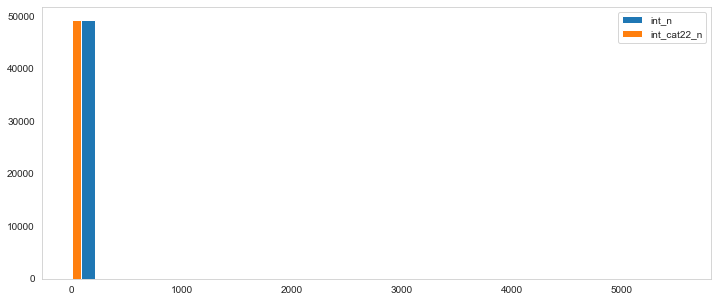

In [120]:
# a variavel de contagem de interaçoes está com uma dispersao de resultados alta, indo de 0 até +5000. Entender se é comportamento normal ou outlier.
df['int_n'].hist(bins=25, grid=False, figsize=(12,5), zorder=2, rwidth=0.9, legend = True)
df['int_cat22_n'].hist(bins=25, grid=False, figsize=(12,5), zorder=2, rwidth=0.9, legend = True)


#### Identificando Outliers: Método do desvio padrão (Z-score)

In [121]:
dt_mean, dt_std = np.mean(df['int_n']), np.std(df['int_n'])
cut_off = dt_std * 3
lower, upper = dt_mean - cut_off, dt_mean + cut_off

df_outlier_int_n_new_method = df[(df['int_n'] < lower) | (df['int_n'] > upper)]


In [122]:
# retorna resultados dos outliers do metodo desvio padrão: o minimo, o maximo e a quantidade
df_outlier_int_n_new_method['int_n'].min(), df_outlier_int_n_new_method['int_n'].max(), df_outlier_int_n_new_method['int_n'].shape


(123.0, 5549.0, (137,))

In [123]:
#observando a distribuiçao da quantidade de usuários por tíers de quantidade de transacões por outliers encontrados
df_outlier_int_n_new_method["int_n"].groupby(pd.cut(df["int_n"], np.arange(0, 2500, 100))).count()

int_n
(0, 100]         0
(100, 200]      61
(200, 300]      22
(300, 400]      16
(400, 500]       7
(500, 600]       8
(600, 700]       7
(700, 800]       3
(800, 900]       1
(900, 1000]      2
(1000, 1100]     1
(1100, 1200]     1
(1200, 1300]     1
(1300, 1400]     1
(1400, 1500]     0
(1500, 1600]     0
(1600, 1700]     2
(1700, 1800]     1
(1800, 1900]     0
(1900, 2000]     0
(2000, 2100]     1
(2100, 2200]     0
(2200, 2300]     0
(2300, 2400]     0
Name: int_n, dtype: int64

#### Identificando Outliers: DBScan


In [124]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(df[["int_n", "int_cat22_n"]])
distances, indices = nbrs.kneighbors(df[["int_n", "int_cat22_n"]])

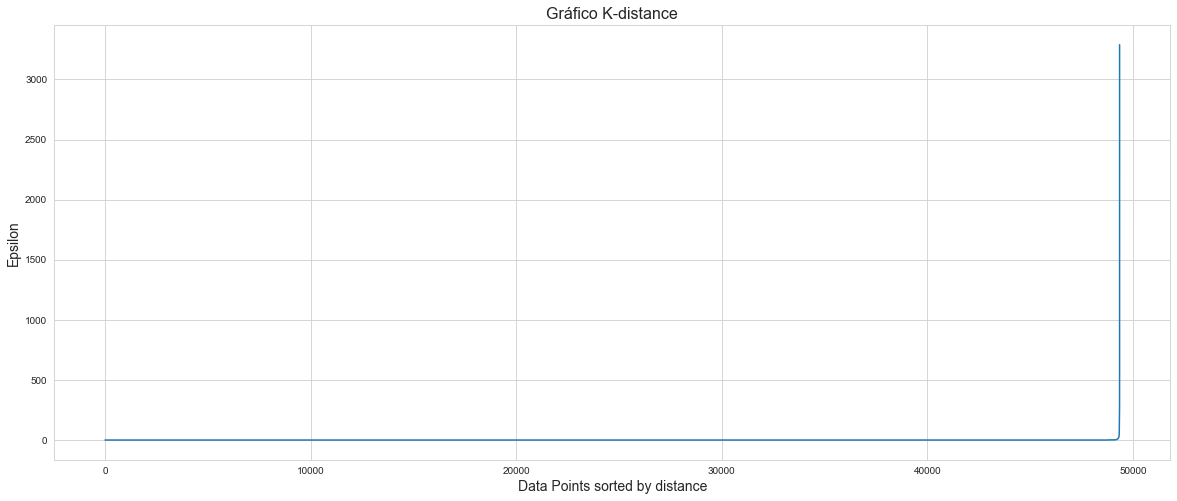

In [125]:
# Plotando grafico de K-distancia 
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,8))
plt.plot(distances)
plt.title('Gráfico K-distance',fontsize=16)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
data = df[["int_n","int_cat22_n"]]
model = DBSCAN(eps = 1500, min_samples = 3).fit(data) #modelo e fit dos dados

In [ ]:
# visualize outputs
colors = model.labels_
plt.scatter(df["int_n"], df["int_cat22_n"], c = colors)

In [ ]:
# rotulando os output do modelo:
outliers = df[model.labels_ == -1]
not_outliers = df[model.labels_ != -1]


In [ ]:
# Quantidade de outliers detectados:
outliers.shape

In [ ]:
# retirando os outliers
df_clean = df[(df['int_n'] >= lower) | (df['int_n'] <= upper)] 

In [ ]:
df_clean.shape

#### normalizando os dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_minMax = MinMaxScaler()

colunas = ['ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv', 'user_rec',
       'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n', 'tran_n_r', 'rev_sum',
       'rev_sum_r', 'major_spend_r', 'int_cat_n_avg', 'int_itm_n_avg',
       'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd', 'ses_wknd_r',
       'ses_len_avg', 'time_to_int', 'int_cat1_n', 'int_cat2_n', 'int_cat3_n',
       'int_cat4_n', 'int_cat5_n', 'int_cat6_n', 'int_cat7_n', 'int_cat8_n',
       'int_cat9_n', 'int_cat10_n', 'int_cat11_n', 'int_cat12_n',
       'int_cat13_n', 'int_cat16_n', 'int_cat17_n',
       'int_cat18_n', 'int_cat19_n', 'int_cat20_n', 'int_cat21_n',
       'int_cat22_n', 'int_cat23_n', 'int_cat24_n','target_class']

df = pd.DataFrame(scaler_minMax.fit_transform(df_clean), columns=colunas)

In [ ]:
# como a variável que se quer predizer também foi convertida em float, iremos transformar em inteiro novamente, pois é um numero binário.
df.target_class = df.target_class.astype(int)


In [ ]:
df.shape

# Análise e exploraçao dos dados 

<AxesSubplot:ylabel='ses_rec_avg'>

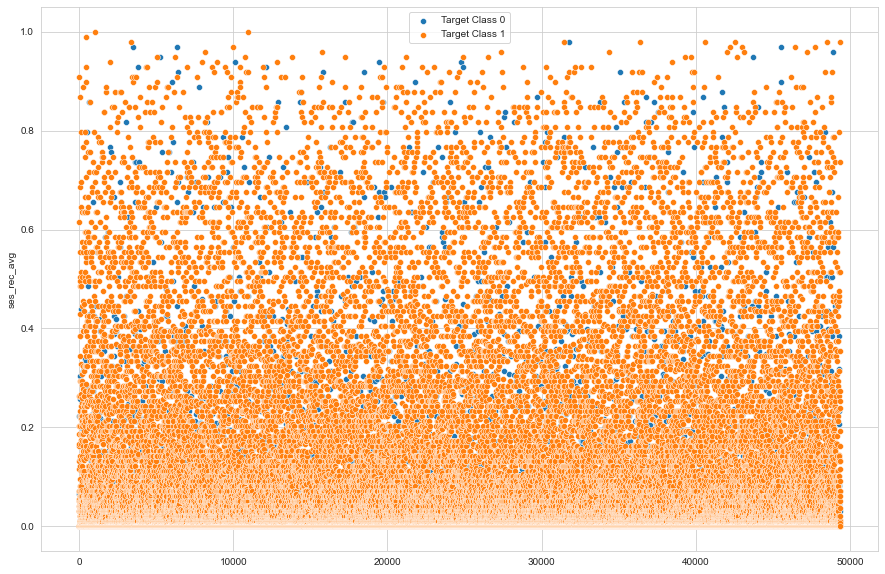

In [31]:
idx = np.where(df['target_class'] == 0.0)
idx2 = np.where(df['target_class'] == 1.0)

sns.set_style("whitegrid")

colors = ["#000", "#6fdd7f"]

sns.color_palette("tab10")

# plt.plot(color=colors)

# rcParams['figure.figsize'] = 20, 10
# fig = plt.figure()

plt.subplots(figsize=(15,10))
# plt.subplot(1,2,1)
# sns.color_palette()

sns.scatterplot(data = df['ses_rec_avg'].iloc[idx],label='Target Class 0')
sns.scatterplot(data = df['ses_rec_avg'].iloc[idx2], label='Target Class 1')



/var/folders/wp/d442_yjd3r7bs1s744_n3s6r0000gn/T/ipykernel_68935/2080915214.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


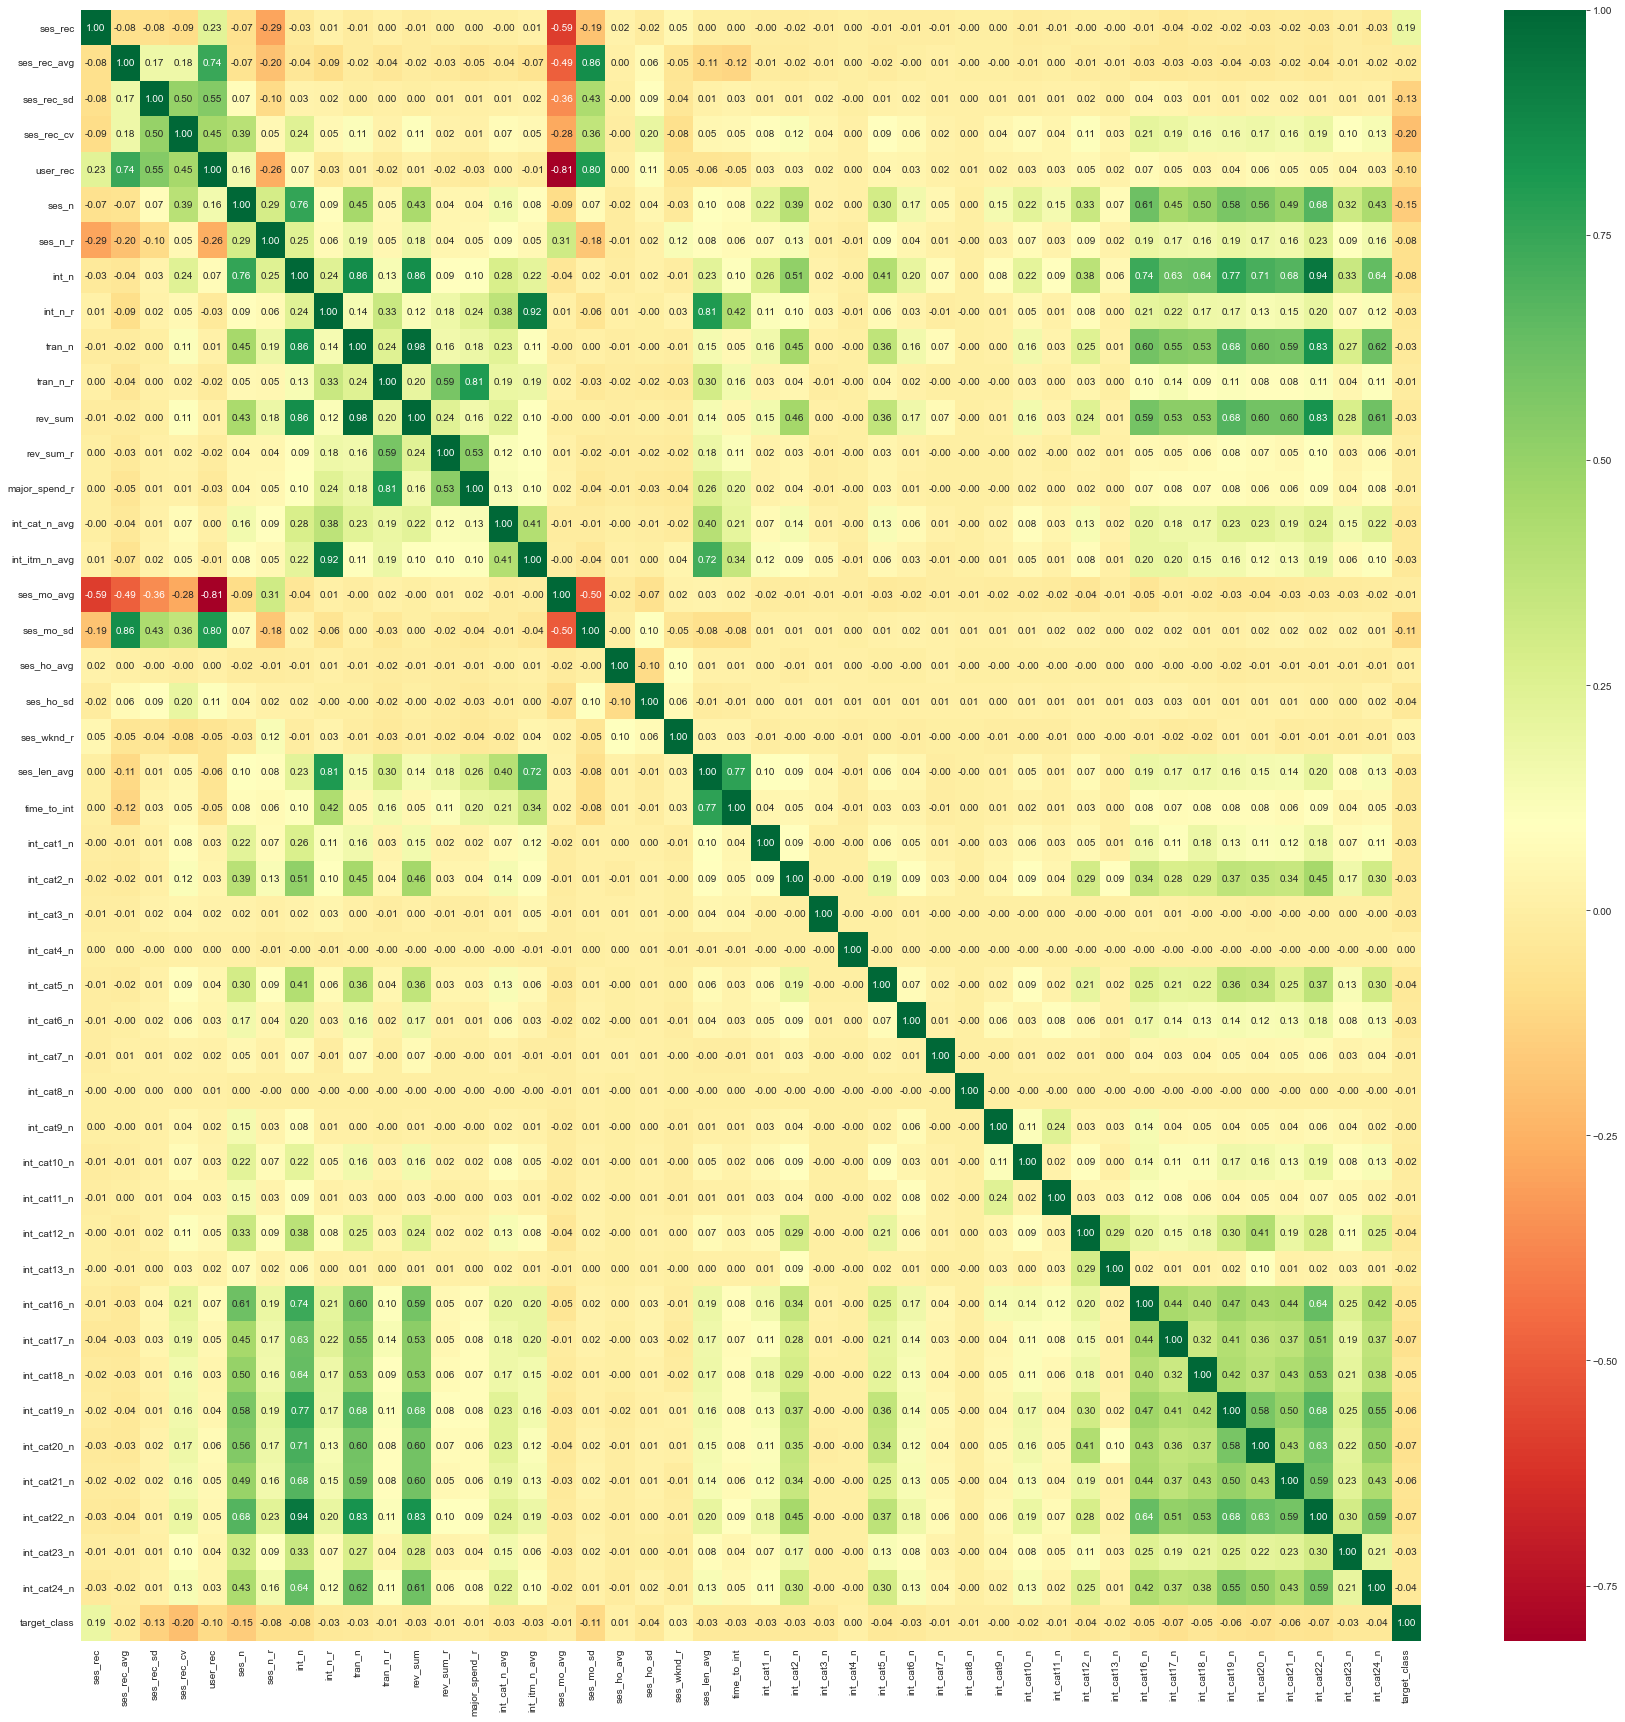

In [32]:
from pylab import rcParams

# init figure size
# rcParams['figure.figsize'] = 50, 50
fig = plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='RdYlGn',)
fig.show()



<AxesSubplot:ylabel='ses_rec_avg'>

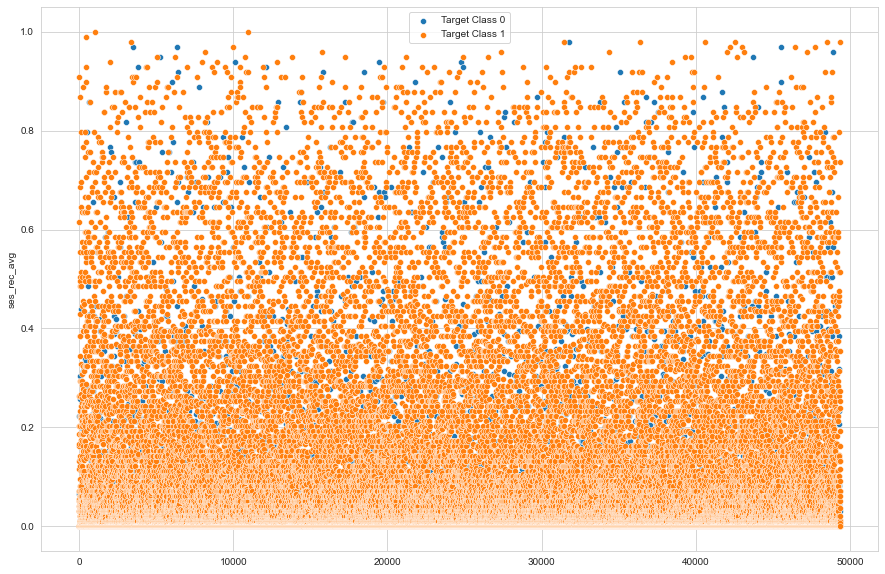

In [33]:
# grafico de dispersão separando dados por churn/não churn

idx = np.where(df['target_class'] == 0.0)
idx2 = np.where(df['target_class'] == 1.0)

sns.set_style("whitegrid")
sns.color_palette("tab10")

# colors = ["#000", "#6fdd7f"]
# plt.plot(color=colors)

# rcParams['figure.figsize'] = 20, 10
# fig = plt.figure()

plt.subplots(figsize=(15,10))
# plt.subplot(1,2,1)
# sns.color_palette()

sns.scatterplot(data = df['ses_rec_avg'].iloc[idx],label='Target Class 0')
sns.scatterplot(data = df['ses_rec_avg'].iloc[idx2], label='Target Class 1')

# plt.show();

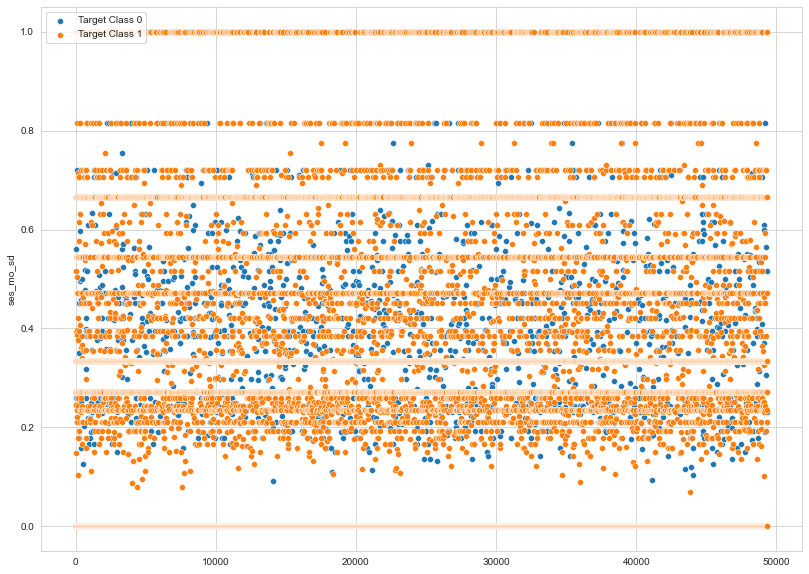

In [34]:
colors = ["#FF0B04", "#4374B3"]

plt.subplots(figsize=(30,10))
plt.subplot(1,2,1)
sns.scatterplot(data = df['ses_mo_sd'].iloc[idx],label='Target Class 0')
sns.scatterplot(data = df['ses_mo_sd'].iloc[idx2], label='Target Class 1')

plt.show();

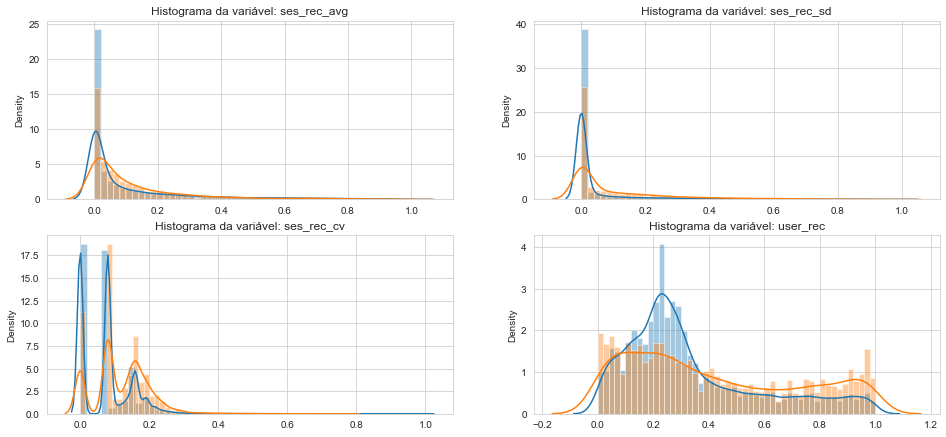

In [35]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# estilo do gráfico    
sns.set_style("whitegrid")
colors = ["#4374B3", "#6fdd7f"]

v_features = df.iloc[:,1:5].columns

plt.figure(figsize=(16,47*2))
gs = gridspec.GridSpec(24, 2)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.target_class == 1.0], bins=50)
    sns.distplot(df[cn][df.target_class == 0.0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Histograma da variável: ' + str(cn))
plt.show()

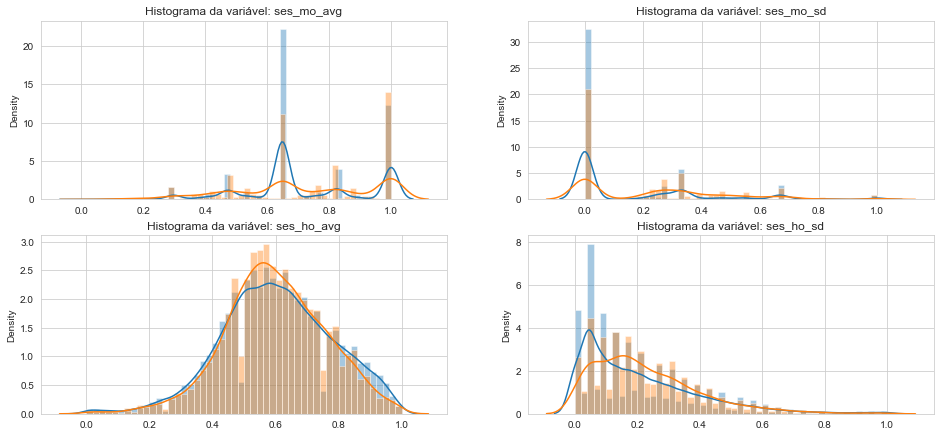

In [36]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# estilo do gráfico    
sns.set_style("whitegrid")
colors = ["#4374B3", "#6fdd7f"]

v_features = df.iloc[:,16:20].columns

plt.figure(figsize=(16,47*2))
gs = gridspec.GridSpec(24, 2)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.target_class == 1.0], bins=50)
    sns.distplot(df[cn][df.target_class == 0.0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Histograma da variável: ' + str(cn))
plt.show()

## Modelagem

### Regressao logistica

#### dividindo a base entre treino e teste

In [37]:
from sklearn.model_selection import train_test_split
colunas = df.iloc[:,1:45].columns
X = df[colunas]
y = df['target_class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

#### treinando, fitando e predizendo com regressão logistica.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [39]:
lr = LogisticRegression()
lr_model = lr.fit(X_train,y_train)
lr_y_pred = lr_model.predict(X_test)

print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.05      0.09      1174
           1       0.89      1.00      0.94      8698

    accuracy                           0.88      9872
   macro avg       0.78      0.52      0.51      9872
weighted avg       0.86      0.88      0.84      9872



<AxesSubplot:>

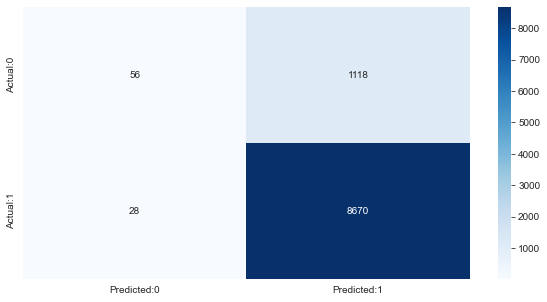

In [40]:
cm = confusion_matrix(y_test,lr_y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index = ['Actual:0','Actual:1'])
plt.figure(figsize = (10,5))
sns.heatmap(conf_matrix, annot = True,fmt = 'd',cmap = 'Blues')

In [41]:
y_pred_prob = lr.predict_proba(X_test)[:,:]
y_pred_prob_df = pd.DataFrame(data = y_pred_prob, columns = ['Prob of Churn (0)','Prb of Not Churn (1)'])
y_pred_prob_df.head()

,Prob of Churn (0),Prb of Not Churn (1)
0,0.155682,0.844318
1,0.072369,0.927631
2,0.047326,0.952674
3,0.156991,0.843009
4,0.059626,0.940374


Como resultado inicial, observa-se que a métrica precisão, que avalia a proporção de dados corretamente preditos por rótulo, retornou um valor alto de 0.67 para o rótulo que queremos prever, rótulo 0.
Porém, a métrica fica enviesada por termos dados desbalanceados. 

O interesse é prever apenas o rótulo churn, portanto, qualquer valor classificado no rótulo de não-churn corretamente, que está em maior proporção, não deve pesar tanto quanto a previsão do rótulo de interesse (churn). Por isso, a métrica precisão não é eficiente agora. 
Observando a métrica F1-score, que calcula o resultado levando em consideração a precisão e o recall (que identifica os acertos), vemos um resultado de 0.09. Este resultado condiz mais com a realidade da qualidade do modelo, que é extremamente baixa. 

Esta visão fica mais clara quando observamos a matriz de confusão, que mostra que 56 dados foram classificados como churn corretamente e predizendo errado 1.118 dados erroneamente.


### regressão logistica com valiação cruzada ( cross-validation )

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
# função para testar um range de números para encontrar o melhor valor para utilizar no K-fold

for i in range(3, 10):
    scores = cross_val_score(lr, X, y, cv=i, scoring='precision')
    print(str(i) + ' -> ' + str(np.mean(scores)) + ' - min: '  + str(scores.min()) + ' - max: ' + str(scores.max()))

3 -> 0.8898721729598013 - min: 0.8894681960375391 - max: 0.89016242721422
4 -> 0.8900249359185073 - min: 0.8895334586158999 - max: 0.890289831341084
5 -> 0.8900453544185879 - min: 0.8891162029459901 - max: 0.8908793121097349
6 -> 0.8901345055537296 - min: 0.8892568064753495 - max: 0.8914833476711319
7 -> 0.8901184613916046 - min: 0.8892872508246092 - max: 0.891566265060241
8 -> 0.889946232602747 - min: 0.8887800097991181 - max: 0.8916571053925586
9 -> 0.8901049529152671 - min: 0.8891961651917404 - max: 0.8914085545722714


#### a melhor quantidade de k-fold a ser utilizada é a 6, que obteve a melhor média de score

In [44]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(lr, X, y, cv=6)
conf_mat = confusion_matrix(y, y_pred)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.05      0.09      5647
           1       0.89      1.00      0.94     43711

    accuracy                           0.89     49358
   macro avg       0.75      0.52      0.51     49358
weighted avg       0.86      0.89      0.84     49358



<AxesSubplot:>

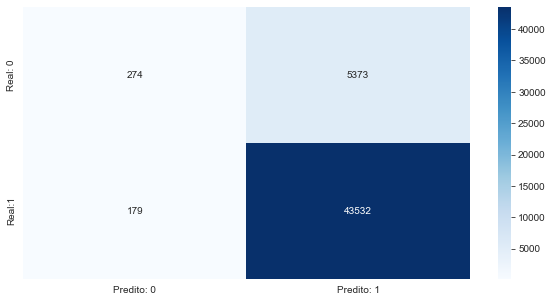

In [45]:
conf_matrix = pd.DataFrame(data=conf_mat,columns=['Predito: 0','Predito: 1'],index = ['Real: 0','Real:1'])
plt.figure(figsize = (10,5))
sns.heatmap(conf_matrix, annot = True,fmt = 'd',cmap = 'Blues')

### Regressão logística com validação cruzada + superamostragem (executado com gridsearchCV) 

In [46]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

## organiza o dado antes de aplic
pipeline = Pipeline(steps = [['smote', SMOTE(random_state=1)],
                                ['classifier', LogisticRegression(random_state=1,
                                                                  max_iter=1000)]])

# definição dos k-folds; seguiremos com o valor 6 que foi encontrado anteriormente.
stratified_kfold = StratifiedKFold(n_splits=6,
                                       shuffle=True,
                                       random_state=1)
 
# range de números para serem testados nos parâmentros do grid search    
param_grid = {'classifier__C':[0.01, 0.1, 1, 10, 100]}

#o algoritmo grid seach executará a Pipeline defiinida com SMOTE e Regressão Logística,
# e encontrará os melhores parâmetros para o classificador
grid_search = GridSearchCV(estimator = pipeline,
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = stratified_kfold,
                           n_jobs = -1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
cv_score = grid_search.best_score_

test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.7096094532030283
Test score: 0.7214943085469137


In [47]:
grid_search.best_params_

{'classifier__C': 100}

In [48]:
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.66      0.32      1174
           1       0.94      0.66      0.77      8698

    accuracy                           0.66      9872
   macro avg       0.57      0.66      0.55      9872
weighted avg       0.85      0.66      0.72      9872



<AxesSubplot:>

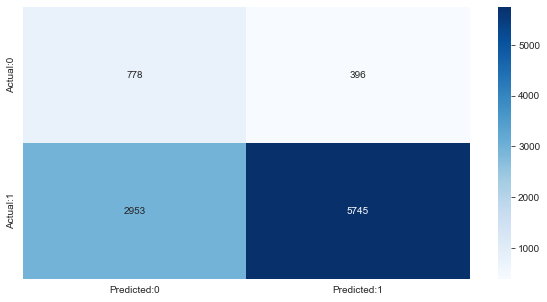

In [49]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index = ['Actual:0','Actual:1'])
plt.figure(figsize = (10,5))
sns.heatmap(conf_matrix, annot = True,fmt = 'd',cmap = 'Blues')

Observa-se que agora o modelo teve um ganho significativo em relação ao teste anterior. Comparando o f1-score, recebemos 0.32, contra os 0.09 do modelo anterior.
A precisão de dados churn caiu, porém, o modelo agora identifica e consegue classificar mais dados


# Modelos de classificação finais

## Logistic Regression & Random Forest & Decision Tree

In [50]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

logi = LogisticRegression(C=10, random_state=1, warm_start=True, n_jobs=-1)
dt = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1, n_jobs=-1, max_features="auto", warm_start=True)

ensemble_clf = [logi, dt, rf] 


In [51]:
#### guardando os modelos em variáveis para executarmos depois

In [52]:
params_lr = {'classifier__C': [0.1, 1, 10, 100], 'classifier__penalty':['l2', None]}

params_dt = {'classifier__criterion':['gini', 'entropy'], 'classifier__splitter': ['random', 'best'], 'classifier__max_depth': np.arange(3, 15, 3), 
             'classifier__min_samples_leaf':  np.arange(5, 16,5), 'classifier__max_features': ['auto'], 'classifier__class_weight': ['balanced', None]}

params_rf = {'classifier__max_depth': np.arange(5,25,5), 'classifier__min_samples_leaf': np.arange(5, 16,5), 'classifier__n_estimators': np.arange(50,152,50)}

parameters_list = [params_lr, params_dt, params_rf]

model_log = ["_logistic", "_dtree", "_rf"]

list_result_cv = []


In [53]:
# definição dos k-folds; seguiremos com o valor 6 que foi encontrado anteriormente.
stratified_kfold = StratifiedKFold(n_splits=6,
                                       shuffle=True,
                                       random_state=1)

for i in range(len(ensemble_clf)):
    ## pipeline para organizar os algoritmos a serem aplicados
    pipeline = Pipeline(steps = [['smote', SMOTE(random_state=1)],
                                ['classifier', ensemble_clf[i]]])
    
    grid_search = GridSearchCV(estimator = pipeline,
                           param_grid = parameters_list[i],
                           scoring = 'roc_auc',
                           cv = stratified_kfold,
                           n_jobs = -1).fit(X_train, y_train)
    
    cv_score = grid_search.best_score_
    test_score = grid_search.score(X_test, y_test)
    print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
    
    list_result_cv.append([model_log , pd.DataFrame(grid_search.cv_results_)])


Fitting 6 folds for each of 8 candidates, totalling 48 fits
Cross-validation score: 0.7087109472817148
Test score: 0.7186791359348308
Fitting 6 folds for each of 96 candidates, totalling 576 fits
Cross-validation score: 0.6810376955776435
Test score: 0.690631508623847
Fitting 6 folds for each of 36 candidates, totalling 216 fits
Cross-validation score: 0.7269787206242269
Test score: 0.7330248430879369


## Regressão logística com melhores hiperparemetros

In [54]:
list_result_cv[0][1].sort_values('rank_test_score').head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
6,1.332673,0.0351,0.007067,0.000726,100,l2,"{'classifier__C': 100, 'classifier__penalty': ...",0.705814,0.698259,0.717404,0.710417,0.7121,0.708271,0.708711,0.005885,1


In [55]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

## organiza o dado antes de aplic
pipeline = Pipeline(steps = [['smote', SMOTE(random_state=1)],
                                ['classifier', LogisticRegression(random_state=1,
                                                                  max_iter=1000)]])

# definição dos k-folds; seguiremos com o valor 6 que foi encontrado anteriormente.
stratified_kfold = StratifiedKFold(n_splits=6,
                                       shuffle=True,
                                       random_state=1)
 
# Melhore classificador    
param_grid = {'classifier__C':[100]}

#o algoritmo grid seach executará a Pipeline defiinida com SMOTE e Regressão Logística,
# e encontrará os melhores parâmetros para o classificador
grid_search_lr = GridSearchCV(estimator = pipeline,
                           scoring = 'roc_auc',
                           param_grid = param_grid,
                           cv = stratified_kfold,
                           n_jobs = -1)

grid_search_lr.fit(X_train, y_train)
cv_score = grid_search_lr.best_score_

test_score = grid_search_lr.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.7096094532030283
Test score: 0.7214943085469137


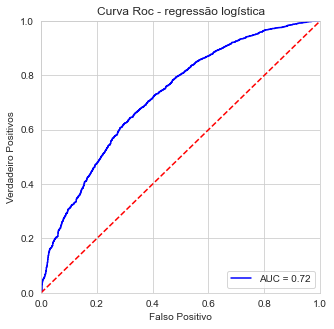

In [56]:
from sklearn.metrics import roc_curve, auc

# calculate the fpr and tpr for all thresholds of the classification
probs = grid_search_lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('Curva Roc - regressão logística')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Verdadeiro Positivos')
plt.xlabel('Falso Positivo')

plt.show()

<AxesSubplot:title={'center':'regressão logística'}>

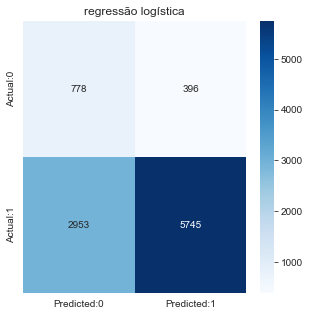

In [57]:
preds = grid_search_lr.predict(X_test)
cm = confusion_matrix(y_test,preds)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index = ['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
plt.title('regressão logística')
sns.heatmap(conf_matrix, annot = True,fmt = 'd',cmap = 'Blues')



## Arvore de decisao com melhores hiperparemetros

In [58]:
list_result_cv[1][1].sort_values('rank_test_score').head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__class_weight,param_classifier__criterion,param_classifier__max_depth,param_classifier__max_features,param_classifier__min_samples_leaf,param_classifier__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
87,0.669026,0.029769,0.006265,0.002555,None,entropy,9,auto,10,best,"{'classifier__class_weight': None, 'classifier...",0.682088,0.671765,0.673313,0.687336,0.680081,0.691644,0.681038,0.007069,1


In [59]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

## organiza o dado antes de aplic
pipeline = Pipeline(steps = [['smote', SMOTE(random_state=1)],
                                ['classifier', DecisionTreeClassifier(random_state=1)]])

# definição dos k-folds; seguiremos com o valor 6 que foi encontrado anteriormente.
stratified_kfold = StratifiedKFold(n_splits=6,
                                       shuffle=True,
                                       random_state=1)
 
# Melhor hiperparametro para o classificador    
param_grid = {'classifier__criterion':['entropy'], 'classifier__splitter': ['best'], 'classifier__max_depth': np.array([9]), 
             'classifier__min_samples_leaf':  np.array([10]), 'classifier__max_features': ['auto'], 'classifier__class_weight': [None]}


#o algoritmo grid seach executará a Pipeline defiinida com SMOTE e Regressão Logística,
# e encontrará os melhores parâmetros para o classificador
grid_search_dt = GridSearchCV(estimator = pipeline,
                           scoring = 'roc_auc',
                           param_grid = param_grid,
                           cv = stratified_kfold,
                           n_jobs = -1)

grid_search_dt.fit(X_train, y_train)
cv_score_dt = grid_search_dt.best_score_

test_score_dt = grid_search_dt.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score_dt}')

Cross-validation score: 0.7096094532030283
Test score: 0.690631508623847


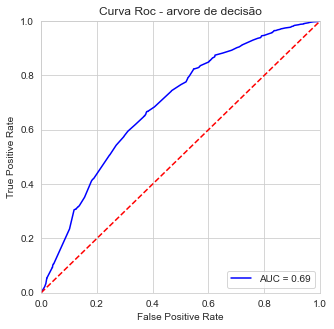

In [60]:
from sklearn.metrics import roc_curve, auc

# calculate the fpr and tpr for all thresholds of the classification
probs = grid_search_dt.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('Curva Roc - arvore de decisão')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

<AxesSubplot:title={'center':'arvore de decisão'}>

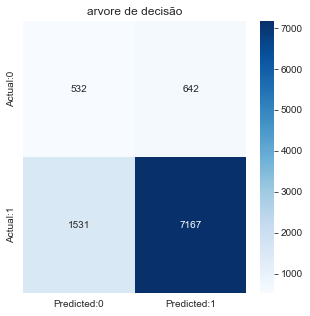

In [61]:
preds = grid_search_dt.predict(X_test)
# preds = probs[:,1]
cm = confusion_matrix(y_test,preds)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index = ['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
plt.title('arvore de decisão')
sns.heatmap(conf_matrix, annot = True,fmt = 'd',cmap = 'Blues')



## Random Forest com os melhores hiperparâmetros

In [62]:
list_result_cv[0][1].sort_values('rank_test_score').head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
6,1.332673,0.0351,0.007067,0.000726,100,l2,"{'classifier__C': 100, 'classifier__penalty': ...",0.705814,0.698259,0.717404,0.710417,0.7121,0.708271,0.708711,0.005885,1


In [63]:
## organiza o dado antes de aplic
pipeline = Pipeline(steps = [['smote', SMOTE(random_state=1)],
                                ['classifier', RandomForestClassifier(random_state=1, max_features="auto", warm_start=True)]])

# definição dos k-folds; seguiremos com o valor 6 que foi encontrado anteriormente.
stratified_kfold = StratifiedKFold(n_splits=6,
                                       shuffle=True,
                                       random_state=1)
 
# Melhor hiperparametro para o classificador    
params_rf = {'classifier__max_depth': np.array([15]), 'classifier__min_samples_leaf': np.array([10]),
             'classifier__n_estimators': np.array([150])}

#o algoritmo grid seach executará a Pipeline defiinida com SMOTE e Regressão Logística,
# e encontrará os melhores parâmetros para o classificador
grid_search_rf = GridSearchCV(estimator = pipeline,
                           scoring = 'roc_auc',
                           param_grid = params_rf,
                           cv = stratified_kfold,
                           n_jobs = -1)

grid_search_rf.fit(X_train, y_train)
cv_score_rf = grid_search_rf.best_score_

test_score_rf = grid_search_rf.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score_rf}')

Cross-validation score: 0.7096094532030283
Test score: 0.7330248430879369


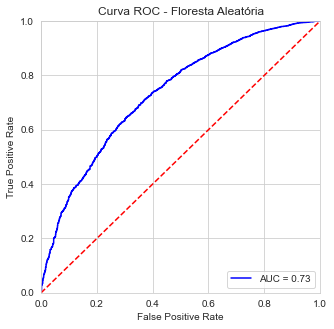

In [64]:
# calculate the fpr and tpr for all thresholds of the classification
probs = grid_search_rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('Curva ROC - Floresta Aleatória')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

<AxesSubplot:title={'center':'florestas aleatórias'}>

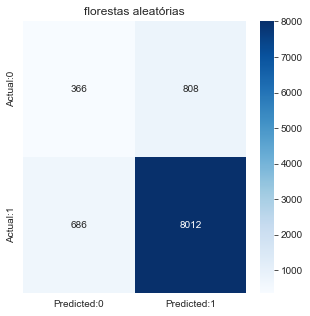

In [65]:
preds = grid_search_rf.predict(X_test)
# preds = probs[:,1]
cm = confusion_matrix(y_test,preds)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index = ['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
plt.title('florestas aleatórias')
sns.heatmap(conf_matrix, annot = True,fmt = 'd',cmap = 'Blues')


### Variáveis de importância para os modelos em árvore

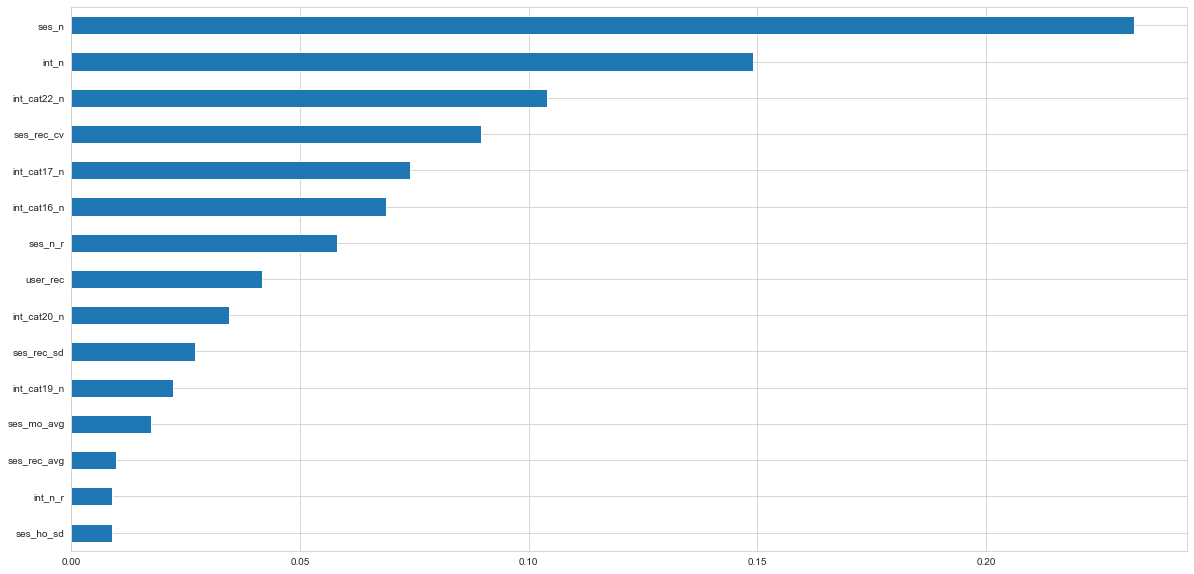

In [66]:
# Modelo Decision Tree
plt.figure(figsize = (20,10))
feat_importances = pd.Series(grid_search_dt.best_estimator_._final_estimator.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh').invert_yaxis() 


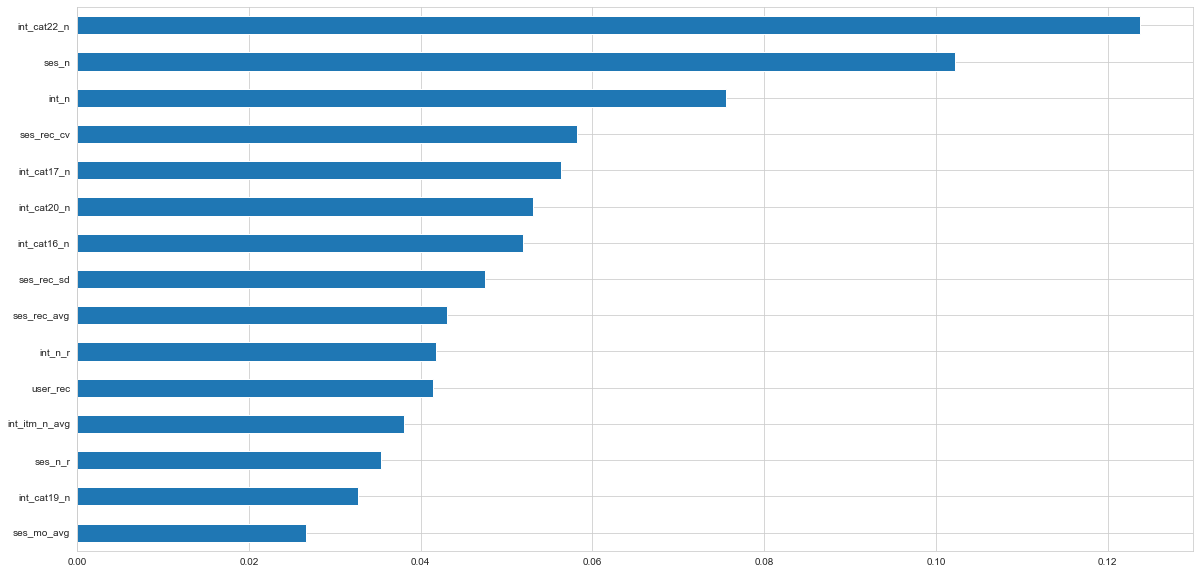

In [67]:
# Modelo Random Forest
plt.figure(figsize = (20,10))
feat_importances = pd.Series(grid_search_rf.best_estimator_._final_estimator.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh').invert_yaxis() 

## Base secundária de Churn

### base sec: processamento, modelagem e limpeza do dataset

In [127]:
file_2 = 'Churn_Modelling.csv.xls'
df_secundario = pd.read_csv(file_2)

In [128]:
df_secundario.shape

(10000, 14)

In [129]:
# verificar o tipo, se tem nulos
df_secundario.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [130]:
# retirar variáveis que não possuem relevância para a modelagem
df_secundario.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)  

### base sec: Analise exploratória

<AxesSubplot:>

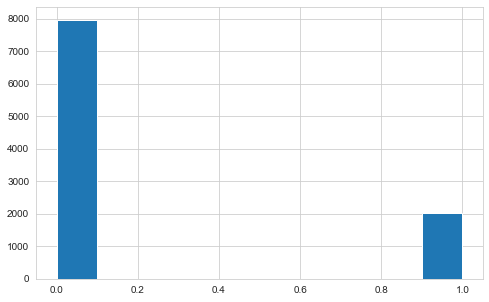

In [131]:
plt.figure(figsize = (8,5))
df_secundario['Exited'].hist()

<AxesSubplot:>

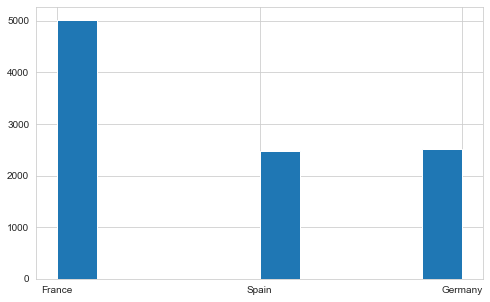

In [132]:
plt.figure(figsize = (8,5))
df_secundario['Geography'].hist()

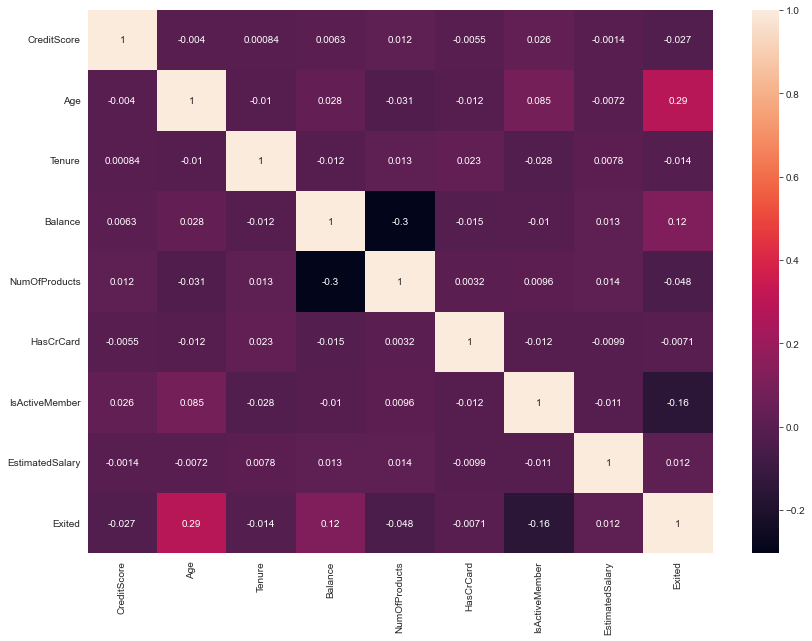

In [133]:
plt.figure(figsize=(14,10))
sns.heatmap(df_secundario.corr(),annot=True);

#### base sec: Ultimos tratamentos da base

In [134]:
# converter dados categóricos em inteiros
df_secundario.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [135]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
le = LabelEncoder()
oHe = OneHotEncoder()

In [136]:
df_secundario = pd.concat([df_secundario, pd.get_dummies(df_secundario.Geography, prefix='Country')], axis=1)

In [137]:
df_secundario.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_France,Country_Germany,Country_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [138]:
df_secundario = df_secundario.drop(['Gender', 'Geography'], axis=1)  

In [139]:
df_secundario.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_France,Country_Germany,Country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [140]:
#normalizando a base de dados
from sklearn.preprocessing import MinMaxScaler

scaler_minMax = MinMaxScaler()

colunas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Country_France',
       'Country_Germany', 'Country_Spain']

df_secundario = pd.DataFrame(scaler_minMax.fit_transform(df_secundario), columns=colunas)
df_secundario.Exited = df_secundario.Exited.astype(int)


In [141]:
df_secundario.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_France,Country_Germany,Country_Spain
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1,1.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0,0.0,0.0,1.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1,1.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0,1.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0,0.0,0.0,1.0


### base sec: Outliers 

In [142]:
dt_mean, dt_std = np.mean(df_secundario['NumOfProducts']), np.std(df_secundario['NumOfProducts'])
cut_off = dt_std * 3
lower, upper = dt_mean - cut_off, dt_mean + cut_off

df_outlier_sec = df_secundario[(df_secundario['NumOfProducts'] < lower) | (df_secundario['NumOfProducts'] > upper)]

In [143]:
df_outlier_sec.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_France,Country_Germany,Country_Spain
7,0.052,0.148649,0.4,0.458540,1.0,1.0,0.0,0.596733,1,0.0,1.0,0.0
70,0.776,0.540541,0.2,0.533067,1.0,1.0,0.0,0.141825,1,0.0,1.0,0.0
1254,0.556,0.378378,0.1,0.186811,1.0,1.0,0.0,0.156318,1,1.0,0.0,0.0
1469,0.938,0.418919,0.1,0.480900,1.0,0.0,0.0,0.830843,1,0.0,1.0,0.0
1488,0.492,0.162162,0.6,0.483646,1.0,1.0,0.0,0.209571,1,0.0,0.0,1.0


Não existem outliers para as colunas da base em questão. Neste caso não podemos considerar 4 produtos como outliers(Na base aparece 1 devido a normalização).

In [144]:
df_secundario.shape

(10000, 12)

In [145]:
### separacao teste e treino

In [146]:
from sklearn.model_selection import train_test_split

colunas_treino = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                  'IsActiveMember', 'EstimatedSalary', 'Country_France',
                  'Country_Germany', 'Country_Spain']

X_sec = df_secundario[colunas_treino]
y_sec = df_secundario['Exited']

X_train_sec,X_test_sec,y_train_sec,y_test_sec = train_test_split(X_sec,y_sec,test_size=0.20,random_state=1)

## base sec: Modelos

### base sec: Cross Validation

###### para encontrar o melhor valor para usar no cross-validation

In [147]:
# função para testar um range de números para encontrar o melhor valor para utilizar no K-fold
for i in range(3, 25):
    scores = cross_val_score(lr, X_sec, y_sec, cv=i, scoring='precision')
    print(str(i) + ' -> ' + str(np.mean(scores)) + ' - min: '  + str(scores.min()) + ' - max: ' + str(scores.max()))

3 -> 0.6394759957959778 - min: 0.6320754716981132 - max: 0.6518987341772152
4 -> 0.6370280789904685 - min: 0.5906432748538012 - max: 0.723404255319149
5 -> 0.6404806047640748 - min: 0.5905511811023622 - max: 0.6950354609929078
6 -> 0.6426102220491834 - min: 0.5658914728682171 - max: 0.7160493827160493
7 -> 0.6390327891311264 - min: 0.574468085106383 - max: 0.7294117647058823
8 -> 0.6396099657692516 - min: 0.57 - max: 0.7407407407407407
9 -> 0.63692331906951 - min: 0.5342465753424658 - max: 0.7457627118644068
10 -> 0.6396971197813153 - min: 0.5333333333333333 - max: 0.7543859649122807
11 -> 0.6374338741286681 - min: 0.5238095238095238 - max: 0.7619047619047619
12 -> 0.6367018116161722 - min: 0.5142857142857142 - max: 0.717391304347826
13 -> 0.6401931193219335 - min: 0.5087719298245614 - max: 0.8
14 -> 0.6435266131878464 - min: 0.5 - max: 0.7317073170731707
15 -> 0.6401990109156634 - min: 0.5384615384615384 - max: 0.76
16 -> 0.6514323173298021 - min: 0.5370370370370371 - max: 0.863636363

## base sec: Modelos de classificação finais 


### base sec: Logistic Regression & Random Forest & Decision Tree

In [148]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

logi_sec = LogisticRegression(C=10, random_state=1, warm_start=True, n_jobs=-1)
dt_sec = DecisionTreeClassifier(random_state=1)
rf_sec = RandomForestClassifier(random_state=1, n_jobs=-1, warm_start=True)

ensemble_clf = [logi_sec, dt_sec, rf_sec] 

In [149]:
list_result_cv_secundario = []

# definição dos k-folds; seguiremos com o valor 8 que foi encontrado anteriormente.
stratified_kfold = StratifiedKFold(n_splits=8,
                                       shuffle=True,
                                       random_state=1)

for i in range(len(ensemble_clf)):
    ## pipeline para organizar os algoritmos a serem aplicados
    pipeline = Pipeline(steps = [['smote', SMOTE(random_state=1)],
                                ['classifier', ensemble_clf[i]]])
    
    grid_search_sec = GridSearchCV(estimator = pipeline,
                           param_grid = parameters_list[i],
                           scoring = 'roc_auc',
                           cv = stratified_kfold,
                           n_jobs = -1).fit(X_train_sec, y_train_sec)
    
    cv_score = grid_search_sec.best_score_
    test_score = grid_search_sec.score(X_test_sec, y_test_sec)
    print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
    
    print(grid_search_sec.best_params_)
    
    list_result_cv_secundario.append([model_log[i], pd.DataFrame(grid_search_sec.cv_results_)])

Cross-validation score: 0.7570293306050018
Test score: 0.7770514233590515
{'classifier__C': 100, 'classifier__penalty': 'l2'}
Cross-validation score: 0.8042403712910018
Test score: 0.8035437649652237
{'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 9, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 10, 'classifier__splitter': 'best'}
Cross-validation score: 0.8535331565315224
Test score: 0.8709528334156816
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 150}


## base sec: Melhor modelo para Regressão Logística

In [150]:
list_result_cv_secundario[0][1].sort_values('rank_test_score').head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
6,0.04145,0.007395,0.00207,0.000858,100,l2,"{'classifier__C': 100, 'classifier__penalty': ...",0.753269,0.763133,0.774876,0.754461,0.79332,0.729546,0.758299,0.72933,0.757029,0.020055,1


In [151]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

pipeline = Pipeline(steps = [['smote', SMOTE(random_state=1)],
                                ['classifier', LogisticRegression(random_state=1,
                                                                  max_iter=1000)]])
stratified_kfold = StratifiedKFold(n_splits=8,
                                       shuffle=True,
                                       random_state=1)
 
# Melhor classificador    
param_grid = {'classifier__C':[100]}

grid_search_lr_sec = GridSearchCV(estimator = pipeline,
                           scoring = 'roc_auc',
                           param_grid = param_grid,
                           cv = stratified_kfold,
                           n_jobs = -1)

grid_search_lr_sec.fit(X_train_sec, y_train_sec)
cv_score_lr_sec = grid_search_lr_sec.best_score_

test_score_lr_sec = grid_search_lr_sec.score(X_test_sec, y_test_sec)
print(f'Cross-validation score: {cv_score_lr_sec}\nTest score: {test_score_lr_sec}')

Cross-validation score: 0.7570293306050018
Test score: 0.7770514233590515


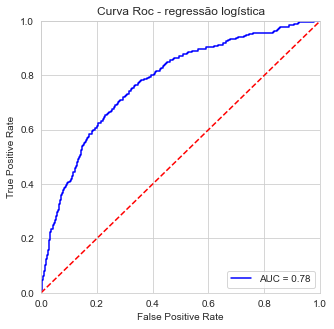

In [152]:
from sklearn.metrics import roc_curve, auc

probs = grid_search_lr_sec.predict_proba(X_test_sec)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test_sec, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('Curva Roc - regressão logística')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

<AxesSubplot:title={'center':'regressão logística'}>

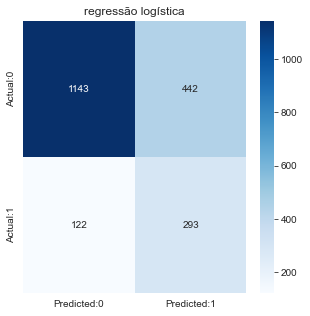

In [153]:
preds = grid_search_lr_sec.predict(X_test_sec)
cm = confusion_matrix(y_test_sec,preds)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index = ['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
plt.title('regressão logística')
sns.heatmap(conf_matrix, annot = True,fmt = 'd',cmap = 'Blues')

## Base sec: Melhor modelo para Árvore de decisão

In [154]:
list_result_cv_secundario[1][1].sort_values('rank_test_score').head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__class_weight,param_classifier__criterion,param_classifier__max_depth,param_classifier__max_features,param_classifier__min_samples_leaf,param_classifier__splitter,...,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
87,0.043756,0.008504,0.002675,0.001238,None,entropy,9,auto,10,best,...,0.807377,0.825741,0.770231,0.814195,0.809792,0.784837,0.790755,0.80424,0.019471,1
39,0.035562,0.005315,0.002151,0.001125,balanced,entropy,9,auto,10,best,...,0.807377,0.825741,0.770231,0.814195,0.809792,0.784837,0.790755,0.80424,0.019471,1


In [155]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

## organiza o dado antes de aplic
pipeline = Pipeline(steps = [['smote', SMOTE(random_state=1)],
                                ['classifier', DecisionTreeClassifier(random_state=1)]])

# definição dos k-folds; seguiremos com o valor 6 que foi encontrado anteriormente.
stratified_kfold = StratifiedKFold(n_splits=6,
                                       shuffle=True,
                                       random_state=1)
 
# Melhor hiperparametro para o classificador   
# {'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 9, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 10, 'classifier__splitter': 'best'}

param_grid = {'classifier__criterion':['entropy'], 'classifier__splitter': ['best'], 'classifier__max_depth': np.array([9]), 
             'classifier__min_samples_leaf':  np.array([10]), 'classifier__max_features': ['auto'], 'classifier__class_weight': ['balanced']}

# o algoritmo grid seach executará a Pipeline defiinida com SMOTE e Regressão Logística,
# e encontrará os melhores parâmetros para o classificador
grid_search_dt_sec = GridSearchCV(estimator = pipeline,
                           scoring = 'roc_auc',
                           param_grid = param_grid,
                           cv = stratified_kfold,
                           n_jobs = -1)

grid_search_dt_sec.fit(X_train_sec, y_train_sec)
cv_score_dt = grid_search_dt_sec.best_score_

test_score_dt = grid_search_dt_sec.score(X_test_sec, y_test_sec)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score_dt}')


Cross-validation score: 0.8535331565315224
Test score: 0.8035437649652237


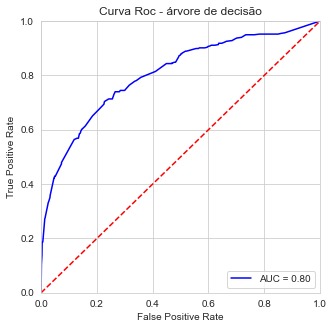

In [156]:
from sklearn.metrics import roc_curve, auc

probs = grid_search_dt_sec.predict_proba(X_test_sec)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test_sec, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('Curva Roc - árvore de decisão')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

<AxesSubplot:title={'center':'arvore de decisão'}>

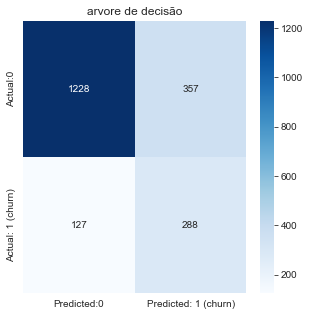

In [157]:
preds = grid_search_dt_sec.predict(X_test_sec)
cm = confusion_matrix(y_test_sec,preds)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted: 1 (churn)'],index = ['Actual:0','Actual: 1 (churn)'])
plt.figure(figsize = (5,5))
plt.title('arvore de decisão')
sns.heatmap(conf_matrix, annot = True,fmt = 'd',cmap = 'Blues')

## base sec: Melhor modelo para Florestas Aleatórias

In [158]:
list_result_cv_secundario[2][1].sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__min_samples_leaf,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
14,1.681222,0.132476,0.048642,0.009336,10,10,150,"{'classifier__max_depth': 10, 'classifier__min...",0.857943,0.856113,0.860586,0.858824,0.875005,0.832506,0.851858,0.835430,0.853533,0.012930,1
32,1.958950,0.087464,0.054170,0.013826,20,10,150,"{'classifier__max_depth': 20, 'classifier__min...",0.857887,0.859761,0.857007,0.862736,0.872471,0.833217,0.850369,0.833137,0.853323,0.012998,2
13,1.122134,0.053773,0.039772,0.013082,10,10,100,"{'classifier__max_depth': 10, 'classifier__min...",0.856659,0.857304,0.861129,0.858676,0.874672,0.832049,0.851178,0.834261,0.853241,0.013195,3
17,1.580386,0.108576,0.052432,0.015376,10,15,150,"{'classifier__max_depth': 10, 'classifier__min...",0.858607,0.856268,0.859930,0.858614,0.876835,0.830745,0.851302,0.833507,0.853226,0.013998,4
11,1.659049,0.089519,0.056024,0.013479,10,5,150,"{'classifier__max_depth': 10, 'classifier__min...",0.858216,0.856529,0.859875,0.857934,0.876371,0.831078,0.848966,0.835541,0.853064,0.013505,5


In [159]:
rf_cl = RandomForestClassifier(random_state=2, warm_start=True)

## organiza o dado antes de aplic
pipeline = Pipeline(steps = [['smote', SMOTE(random_state=1)],
                                ['classifier', rf_cl]])

# definição dos k-folds; seguiremos com o valor 6 que foi encontrado anteriormente.
stratified_kfold = StratifiedKFold(n_splits=8,
                                       shuffle=True,
                                       random_state=1)
 
# Melhor hiperparametro para o classificador   
# {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 150}
params_rf = {'classifier__max_depth': np.array([10]), 'classifier__min_samples_leaf': np.array([10]),
             'classifier__n_estimators': np.array([150])}

#o algoritmo grid seach executará a Pipeline defiinida com SMOTE e Regressão Logística,
# e encontrará os melhores parâmetros para o classificador
grid_search_rf_sec = GridSearchCV(estimator = pipeline,
                           scoring = 'roc_auc',
                           param_grid = params_rf,
                           cv = stratified_kfold,
                           n_jobs = -1).fit(X_train_sec, y_train_sec)

cv_score_rf_sec = grid_search_rf_sec.best_score_

test_score_rf_sec = grid_search_rf_sec.score(X_test_sec, y_test_sec)
print(f'Cross-validation score: {cv_score_rf_sec}\nTest score: {test_score_rf_sec}')


Cross-validation score: 0.8535336615341553
Test score: 0.8734567291247006


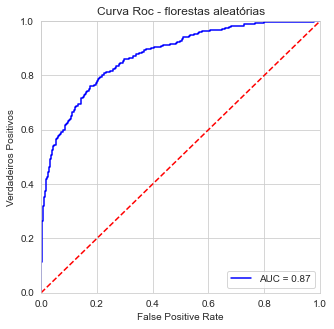

In [160]:
from sklearn.metrics import roc_curve, auc

probs = grid_search_rf_sec.predict_proba(X_test_sec)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test_sec, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('Curva Roc - florestas aleatórias')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Verdadeiros Positivos')
plt.xlabel('False Positive Rate')

plt.show()

<AxesSubplot:title={'center':'florestas aleatórias'}>

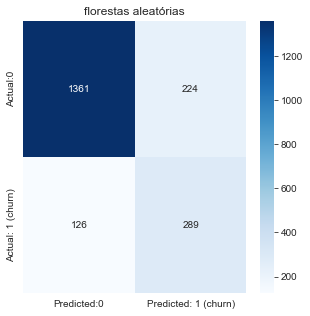

In [161]:
preds = grid_search_rf_sec.predict(X_test_sec)
cm = confusion_matrix(y_test_sec,preds)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted: 1 (churn)'],index = ['Actual:0','Actual: 1 (churn)'])
plt.figure(figsize = (5,5))
plt.title('florestas aleatórias')
sns.heatmap(conf_matrix, annot = True,fmt = 'd',cmap = 'Blues')



#### base sec: Variáveis de importância para os modelos em árvore

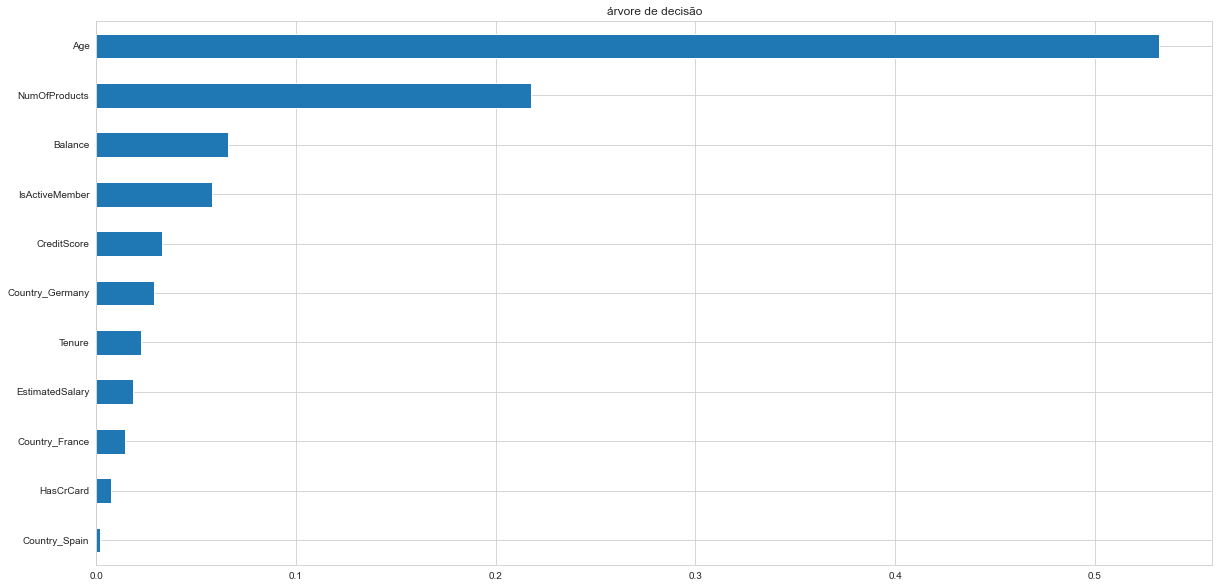

In [162]:
# Modelo Arvore de decisao melhores variaveis
plt.figure(figsize = (20,10))
plt.title('árvore de decisão')
feat_importances = pd.Series(grid_search_dt_sec.best_estimator_._final_estimator.feature_importances_, index=X_train_sec.columns)
feat_importances.nlargest(15).plot(kind='barh').invert_yaxis() 


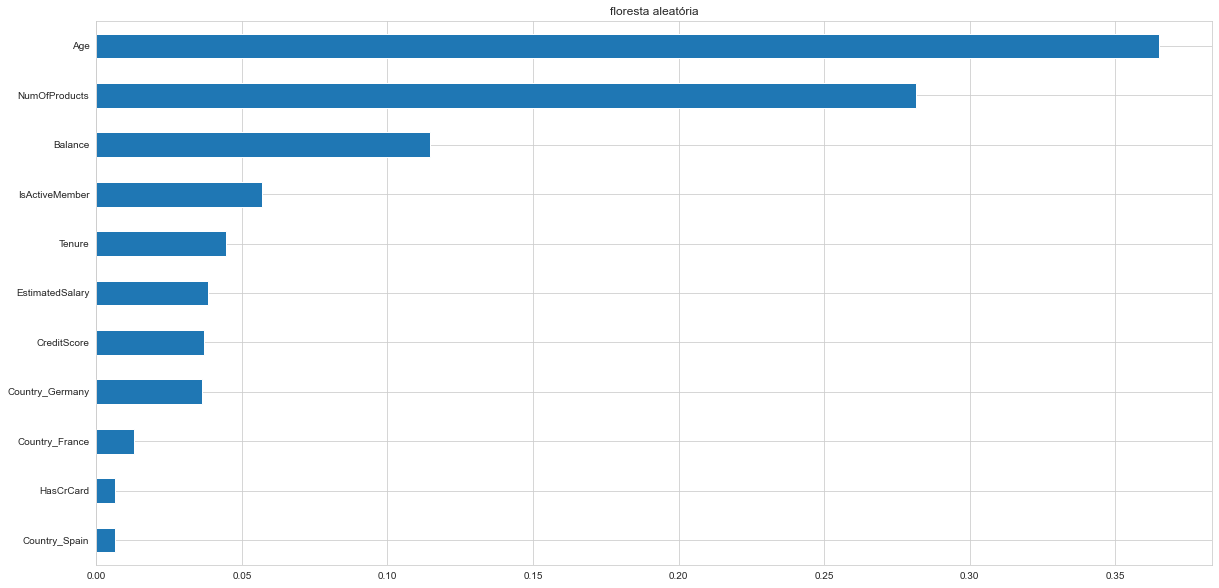

In [163]:
# Modelo Arvore de decisao melhores variaveis
plt.figure(figsize = (20,10))
plt.title('floresta aleatória')
feat_importances = pd.Series(grid_search_rf_sec.best_estimator_._final_estimator.feature_importances_, index=X_train_sec.columns)
feat_importances.nlargest(15).plot(kind='barh').invert_yaxis() 